<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Predicting shots made per game by Kobe Bryant

_Authors: Kiefer Katovich (SF)_

---

In this lab you'll be using regularized regression penalties Ridge, Lasso, and Elastic Net to try and predict how many shots Kobe Bryant made per game in his career.

The Kobe shots dataset has hundreds of columns representing different characteristics of each basketball game. Fitting an ordinary linear regression using every predictor would dramatically overfit the model considering the limited number of observations (games) we have available. Furthermore, many of the predictors have significant multicollinearity. 

**Warning:** Some of these calculations are computationally expensive and may take a while to execute.  It may be worth while to only use a portion of the data to perform these calculations, especially if you have experienced kernel issues in the past.

---

### 1. Load packages and data

In [170]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [171]:
df = pd.read_csv('./datasets/kobe_superwide_games.csv')

---

### 2. Examine the data

- How many columns are there?
- Examine what the observations (rows) and columns represent.
- Why is this data that regularization might be particularly useful for?

In [172]:
print ('Number of Columns:', df.shape[1])

Number of Columns: 645


In [173]:
df_columns_list = list(df.columns)
print (df_columns_list)

['SHOTS_MADE', 'AWAY_GAME', 'SEASON_OPPONENT:atl:1996-97', 'SEASON_OPPONENT:atl:1997-98', 'SEASON_OPPONENT:atl:1999-00', 'SEASON_OPPONENT:atl:2000-01', 'SEASON_OPPONENT:atl:2001-02', 'SEASON_OPPONENT:atl:2002-03', 'SEASON_OPPONENT:atl:2003-04', 'SEASON_OPPONENT:atl:2004-05', 'SEASON_OPPONENT:atl:2005-06', 'SEASON_OPPONENT:atl:2006-07', 'SEASON_OPPONENT:atl:2007-08', 'SEASON_OPPONENT:atl:2008-09', 'SEASON_OPPONENT:atl:2009-10', 'SEASON_OPPONENT:atl:2010-11', 'SEASON_OPPONENT:atl:2011-12', 'SEASON_OPPONENT:atl:2012-13', 'SEASON_OPPONENT:atl:2013-14', 'SEASON_OPPONENT:atl:2014-15', 'SEASON_OPPONENT:atl:2015-16', 'SEASON_OPPONENT:bkn:2012-13', 'SEASON_OPPONENT:bkn:2015-16', 'SEASON_OPPONENT:bos:1996-97', 'SEASON_OPPONENT:bos:1997-98', 'SEASON_OPPONENT:bos:1999-00', 'SEASON_OPPONENT:bos:2001-02', 'SEASON_OPPONENT:bos:2002-03', 'SEASON_OPPONENT:bos:2003-04', 'SEASON_OPPONENT:bos:2004-05', 'SEASON_OPPONENT:bos:2005-06', 'SEASON_OPPONENT:bos:2006-07', 'SEASON_OPPONENT:bos:2007-08', 'SEASON_OPP

In [174]:
df.head(10)

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
3,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
4,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
5,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,6
6,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7
7,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8
8,4.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9
9,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,10


In [175]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [176]:
df.columns[df.isnull().sum()>0]

Index([], dtype='object')

In [177]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SHOTS_MADE,1558.0,7.358793,3.471180,0.0,5.00,7.0,10.000000,22.000000
AWAY_GAME,1558.0,0.500642,0.500160,0.0,0.00,1.0,1.000000,1.000000
SEASON_OPPONENT:atl:1996-97,1558.0,0.001284,0.035817,0.0,0.00,0.0,0.000000,1.000000
SEASON_OPPONENT:atl:1997-98,1558.0,0.001284,0.035817,0.0,0.00,0.0,0.000000,1.000000
SEASON_OPPONENT:atl:1999-00,1558.0,0.000642,0.025335,0.0,0.00,0.0,0.000000,1.000000
SEASON_OPPONENT:atl:2000-01,1558.0,0.000642,0.025335,0.0,0.00,0.0,0.000000,1.000000
SEASON_OPPONENT:atl:2001-02,1558.0,0.001284,0.035817,0.0,0.00,0.0,0.000000,1.000000
SEASON_OPPONENT:atl:2002-03,1558.0,0.001284,0.035817,0.0,0.00,0.0,0.000000,1.000000
SEASON_OPPONENT:atl:2003-04,1558.0,0.000642,0.025335,0.0,0.00,0.0,0.000000,1.000000
SEASON_OPPONENT:atl:2004-05,1558.0,0.000642,0.025335,0.0,0.00,0.0,0.000000,1.000000


---

### 3. Make predictor and target variables. Standardize the predictors.

Why is normalization necessary for regularized regressions?

Use the `sklearn.preprocessing` class `StandardScaler` to standardize the predictors.

In [178]:
'''Importing Standard Scaler from sklearn Library'''

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [179]:
'''Setting up the X Variables or the Predictor Variables'''

X = df.iloc[:,1:]
X.head()

,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,SEASON_OPPONENT:atl:2005-06,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5


In [180]:
'''Setting up the Y Variable or the Targer Variable'''

Y = df['SHOTS_MADE']
Y.head()

0    0.0
1    0.0
2    2.0
3    2.0
4    0.0
Name: SHOTS_MADE, dtype: float64

In [181]:
'''Split the data into the Training and the Test Set for further processing'''

from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.33)

print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(1043, 644)
(1043,)
(515, 644)
(515,)


In [182]:
'''Applying the standardizer and transform to the Training Set'''

ss = StandardScaler()
ss.fit(x_train)
x_train_ss = ss.transform(x_train)
x_train_ss[0:5]

array([[-0.98572035, -0.03097891, -0.04383183, ...,  0.16213828,
        -0.16217154,  0.60079104],
       [-0.98572035, -0.03097891, -0.04383183, ..., -0.62860012,
        -1.01370201, -1.18584004],
       [-0.98572035, -0.03097891, -0.04383183, ...,  1.24041793,
         0.96030044, -0.4764748 ],
       [-0.98572035, -0.03097891, -0.04383183, ...,  0.03459983,
        -1.55558503, -0.07773223],
       [-0.98572035, -0.03097891, -0.04383183, ..., -0.62860012,
         0.10876997, -0.92808932]])

---

### 4. Build a linear regression predicting `SHOTS_MADE` from the rest of the columns.

Cross-validate the $R^2$ of an ordinary linear regression model with 10 cross-validation folds.

How does it perform?

In [183]:
'''Setting up the Linear Regression'''

lr = LinearRegression()
model = lr.fit(x_train_ss, y_train)

'''Calculating the R2 on the Training Data'''

model.score(x_train_ss, y_train)

print ('Model Score on the Training Data: ', model.score(x_train_ss, y_train))

Model Score on the Training Data:  0.825962869216


In [184]:
'''Calculating the different beta coefficients'''
model.coef_

array([ -1.66504393e-01,   6.86459123e+10,   2.93553815e+12,
        -2.29762330e+12,  -3.90429097e+12,   1.91928424e+12,
        -1.49382934e+12,   9.15977687e+12,  -2.82544232e+13,
         4.21488937e+12,  -1.88148161e+11,   3.72813017e+11,
        -1.47360903e+12,   3.01909616e+12,   2.93726426e+13,
        -9.36850747e+12,  -4.24761038e+12,   1.83112341e+13,
         1.39799426e+12,   8.75590155e+11,  -4.24761038e+12,
         1.97791918e+13,   6.86459123e+10,   2.93553815e+12,
        -3.24777048e+12,   1.91928424e+12,  -1.49382934e+12,
        -2.40642650e+12,   3.61679523e+12,   4.21488937e+12,
        -2.65953973e+11,   5.88619146e+11,  -1.47360903e+12,
         7.37748083e+12,  -9.05556981e+11,  -1.37616439e+12,
        -3.00495637e+12,   1.39799426e+12,  -2.06814066e+13,
        -3.27384058e+12,   2.07673569e+12,   1.46628819e+13,
        -3.24777048e+12,  -5.51885114e+12,   2.18234288e+13,
         2.55868851e+12,   4.21488937e+12,  -2.65953973e+11,
         2.63745200e+11,

In [185]:
'''Tranforming the Test Data'''

x_test_ss = ss.transform(x_test)
test_score = model.score(x_test_ss, y_test)
print ('Model score on the Test Data: ', test_score)

Model score on the Test Data:  -1.17399140604e+26


In [186]:
'''Function to print the top 50 coefficients'''
def top_coefs(columns, coefficients, n=50):
    columns = columns[1:]
    coefs = [(columns[i], coef) for i, coef in enumerate(coefficients)]
    return list(sorted(coefs, key=lambda x: abs(x[1]), reverse=True))[:n]

In [187]:
'''Checking the Coefficients for the top 25 coefficients'''
top_coefs(df.columns, model.coef_)

[('COMBINED_SHOT_TYPE:jump_shot', 48907594733790.32),
 ('SEASON:2000-01', 48496364530449.078),
 ('SEASON_OPPONENT:phi:1997-98', -47971526606044.211),
 ('SEASON:1999-00', 41817472206096.578),
 ('SEASON:2013-14', -41301164262796.195),
 ('SHOT_ZONE_AREA:center(c)', -39929082212117.859),
 ('CAREER_GAME_NUMBER', 35801083863907.609),
 ('SEASON_OPPONENT:dal:2014-15', -33027304148219.648),
 ('SEASON:2003-04', 30123216912275.902),
 ('SEASON_OPPONENT:atl:2010-11', 29372642642217.949),
 ('SEASON_OPPONENT:phi:2002-03', -29220891869055.516),
 ('SEASON:1998-99', 28453235869640.066),
 ('SEASON_OPPONENT:atl:2004-05', -28254423241562.352),
 ('SEASON_OPPONENT:was:2005-06', -26903523239918.988),
 ('SHOT_ZONE_RANGE:24+_ft.', 25369306417574.547),
 ('SEASON_OPPONENT:chi:2003-04', 23616797085921.883),
 ('SEASON:2002-03', 23522732346567.18),
 ('SHOT_ZONE_AREA:right_side_center(rc)', -22187659416537.328),
 ('SEASON_OPPONENT:phi:2011-12', 22157818944600.105),
 ('SHOT_ZONE_AREA:right_side(r)', -21902355472102.39

**Results of Linear Regression:** The model scores pretty well with the training data. However when we execute the same test with the training data, the model does not perform well. Hence this is classic case of overfitting. 

In [188]:
'''Performing the same test with the Cross Fold'''

from sklearn.model_selection import cross_val_predict, cross_val_score
lr = LinearRegression()
c = cross_val_score(lr, x_train_ss, y_train, cv=5)

print ('Training Scores: ', c)
print ('Average Training Scores: ', c.mean())

Training Scores:  [ -5.16317550e+28  -3.45985437e+28  -4.53889460e+28  -2.40847491e+28
  -1.45385772e+28]
Average Training Scores:  -3.40485142093e+28


The model performs pretty bad. It has a huge negative value 

---

### 5. Find an optimal value for Ridge regression alpha using `RidgeCV`.

[Go to the documentation and read how RidgeCV works.](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

> *Hint: once the RidgeCV is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.*

Recall that Ridge performs best searching alphas through logarithmic space (`np.logspace`). This may take awhile to fit!


In [189]:
'''Importing the Sklearn Ridge Model'''
from sklearn.linear_model import RidgeCV


'''Setting up the Alpha Values'''
alpha = np.logspace(0,5,200)

'''Setting up the Ridge and Calculating the Optimal Alpha Value'''
ridge = RidgeCV(alphas=alpha, cv=10)
ridgecv_fit = ridge.fit(x_train_ss, y_train)
optimal_ridge_alpha = ridgecv_fit.alpha_

print (optimal_ridge_alpha)

1162.32246868


---

### 6. Cross-validate the Ridge regression $R^2$ with the optimal alpha.

Is it better than the Linear regression? If so, why might this be?

In [190]:
ridge = Ridge(alpha=optimal_ridge_alpha)
ridge.fit(x_train_ss, y_train)
ridge_train_score = ridge.score(x_train_ss, y_train)
ridge_test_score = ridge.score(x_test_ss, y_test)
print ('Train Score with Ridge: ', ridge_train_score)
print ('Test Score with Ridge: ', ridge_test_score)

Train Score with Ridge:  0.777718289209
Test Score with Ridge:  0.612253077461


Yes, the ridge score is a lot better than linear regression. In the case of linear regression, we see that there was overfitting with the training data, which could be seen with the high R score. However when we fit the model with the test score it was not a good model.

With Ridge regression, we see that the model fits well with both the training set and the test set

---

### 7. Find an optimal value for Lasso regression alpha using `LassoCV`.

[Go to the documentation and read how LassoCV works.](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) It is very similar to `RidgeCV`.

> *Hint: again, once the `LassoCV` is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.*

Recall that Lasso, unlike Ridge, performs best searching for alpha through linear space (`np.linspace`). However, you can actually let the LassoCV decide itself what alphas to use by instead setting the keyword argument `n_alphas=` to however many alphas you want it to search over. It is recommended to let sklearn choose the range of alphas.

_**Tip:** If you find your CV taking a long time and you're not sure if its working set `verbose =1`._

In [191]:
from sklearn.linear_model import LassoCV 

lassoCV = LassoCV(n_alphas=1000, cv=10, verbose=1)
lassoCV_fit = lassoCV.fit(x_train_ss, y_train)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [192]:
optimal_lasso_alpha = lassoCV_fit.alpha_
print ('Optimal Value with Alpha: ', optimal_lasso_alpha)

Optimal Value with Alpha:  0.0912808566054


---

### 8. Cross-validate the Lasso $R^2$ with the optimal alpha.

Is it better than the Linear regression? Is it better than Ridge? What do the differences in results imply about the issues with the dataset?

In [193]:
lasso = Lasso(alpha = optimal_lasso_alpha)
lasso_fit = lasso.fit(x_train_ss, y_train)
lasso_train_score = lasso.score(x_train_ss, y_train)
lasso_test_score = lasso.score(x_test_ss, y_test)

print ('Train  Score with Lasso: ', lasso_train_score)
print ('Test Score with Lasso: ', lasso_test_score)

Train  Score with Lasso:  0.707372991935
Test Score with Lasso:  0.646647954396


Both Lasso and Ridge scores are better than the Linear Regression for sure. The R2 values are more consistent on the train and the test set. That said, in this case with so many features variables I beleive it makes sesne to go with Lasson Regression because Lasso actually makes a lot of variables to 0 instead of just minimizing them 

---

### 9. Look at the coefficients for variables in the Lasso.

1. Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.
2. What percent of the variables in the original dataset are "zeroed-out" by the lasso?
3. What are the most important predictors for how many shots Kobe made in a game?

> **Note:** if you only fit the Lasso within `cross_val_score`, you will have to refit it outside of that
function to pull out the coefficients.

In [194]:
lasso.fit(x_train_ss, y_train)

Lasso(alpha=0.091280856605353539, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [210]:
lasso_coeff_df = pd.DataFrame({
    'columns: ' : x_train.columns, 
    'Real Coeff: ': lasso.coef_, 
    'Abs Coeff: ': np.abs(lasso.coef_)
    
})

lasso_coeff_df_g0 = lasso_coeff_df[lasso_coeff_df['Abs Coeff: ']>0]
lasso_coeff_df_g0.head()

,Abs Coeff:,Real Coeff:,columns:
0,0.064796,-0.064796,AWAY_GAME
5,0.003244,0.003244,SEASON_OPPONENT:atl:2001-02
25,0.005958,-0.005958,SEASON_OPPONENT:bos:2001-02
26,0.071565,-0.071565,SEASON_OPPONENT:bos:2002-03
32,0.017332,-0.017332,SEASON_OPPONENT:bos:2008-09


In [211]:
lasso_coeff_df_g0_sorted = lasso_coeff_df_g0.sort_values(by='Abs Coeff: ', ascending=False)

In [212]:
lasso_coeff_df_g0_sorted.head()

,Abs Coeff:,Real Coeff:,columns:
574,1.421817,1.421817,SHOT_TYPE:2pt_field_goal
579,0.631000,0.631000,COMBINED_SHOT_TYPE:jump_shot
575,0.320205,0.320205,SHOT_TYPE:3pt_field_goal
566,0.309320,0.309320,SHOT_ZONE_BASIC:restricted_area
557,0.290945,0.290945,SHOT_ZONE_RANGE:24+_ft.


In [213]:
zero_coeff = np.sum([lasso_coeff_df['Abs Coeff: '] == 0])
zero_coeff

552

In [216]:
total_lasso_coeff = len(lasso_coeff_df)
total_lasso_coeff

644

In [217]:
zeroed_out_percentage = zero_coeff/total_lasso_coeff
zeroed_out_percentage*100

85.714285714285708

The most important predictors are the variables with the highest coefficient values 

---

### 10. Find an optimal value for Elastic Net regression alpha using `ElasticNetCV`.

[Go to the documentation and read how LassoCV works.](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization
- `l1_ratio`: amount of ridge vs. lasso (0 = all ridge, 1 = all lasso)
    
Do not include 0 in the search for `l1_ratio`: it will not allow it and break!

You can use `n_alphas` for the alpha parameters instead of setting your own values: highly recommended!

Also - be careful setting too many l1_ratios over cross-validation folds in your search. It can take a very long time if you choose too many combinations and for the most part there are diminishing returns in this data.

In [233]:
optimal_elastic_net = \
elastic_net = ElasticNetCV(l1_ratio = np.linspace(0.01, 1.0, 25), n_alphas= 100, cv = 10, verbose = 1 )
optimal_en_fit = elastic_net.fit(x_train_ss, y_train)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [237]:
optimal_en_alpha = optimal_en_fit.alpha_
optimal_en_alpha

0.095628057041206666

In [238]:
optimal_en_l1_ratio = optimal_en_fit.l1_ratio_
optimal_en_l1_ratio

0.9587500000000001

---

### 11. Cross-validate the ElasticNet $R^2$ with the optimal alpha and l1_ratio.

How does it compare to the Ridge and Lasso regularized regressions?

In [242]:
elastic_net = ElasticNet(alpha=optimal_en_alpha, l1_ratio=optimal_en_l1_ratio)
elastic_net.fit(x_train_ss, y_train)
elastic_train_score = elastic_net.score(x_train_ss, y_train)
elastic_test_score = elastic_net.score(x_test_ss, y_test)

In [243]:
print ('Elastic Train Score: ', elastic_train_score)
print ('Elastic Test Score: ', elastic_test_score)

Elastic Train Score:  0.706685198663
Elastic Test Score:  0.646654374895


---

### 12. [Bonus] Compare the residuals for the Ridge and Lasso visually.


In [247]:
lasso_fit = lasso.fit(x_train_ss, y_train)

In [248]:
ridge_fit = ridge.fit(x_train_ss, y_train)

In [249]:
y_lasso_predict = lasso_fit.predict(x_train_ss)

In [250]:
y_ridge_predict = ridge_fit.predict(x_train_ss)

In [252]:
y_lasso_residual = y_train - y_lasso_predict

In [253]:
y_ridge_residual = y_train - y_ridge_predict

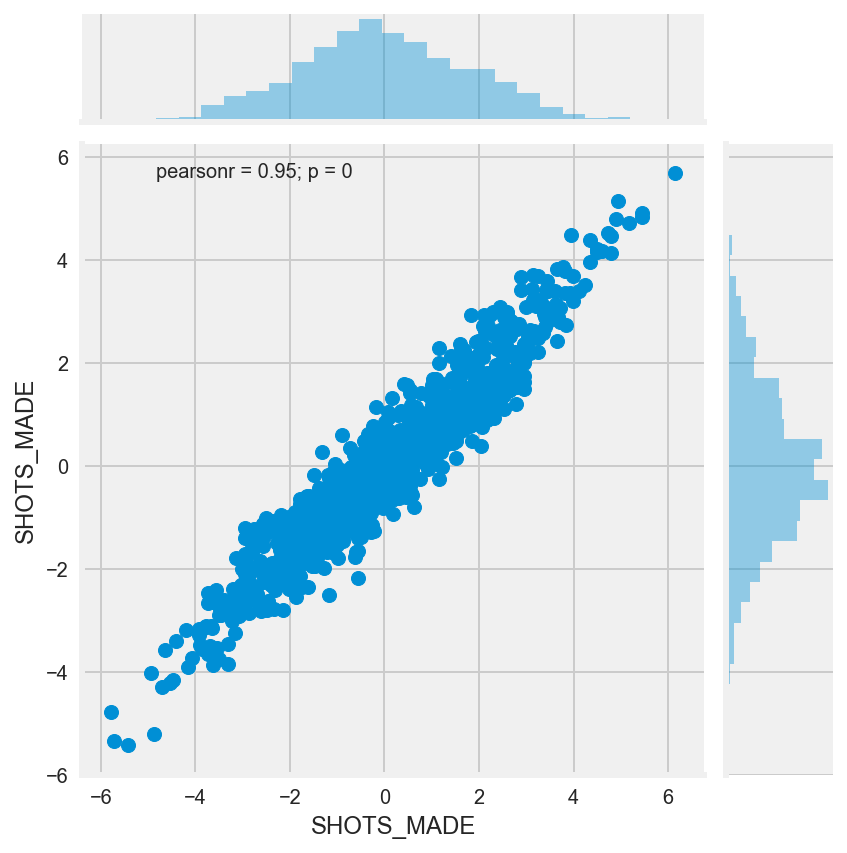

In [254]:
import seaborn as sns 
sns.jointplot(y_lasso_residual, y_ridge_residual)

### From Carl's practice ### 

In [86]:
from sklearn.preprocessing import StandardScaler

y = kobe['SHOTS_MADE'].values
x = df.iloc[:,1:]


ss=StandardScaler()
xs = pd.DataFrame(ss.fit_transform(x), columns = x.columns)
xs.head()


NameError: name 'kobe' is not defined

In [ ]:
def top_coefs(columns, coefficients, n=25):
    columns = columns[1:]
    coefs = [(columns[i], coef) for i, coef in enumerate(coefficients)]
    return list(sorted(coefs, key=lambda x: abs(x[1]), reverse=True))[:n]

In [ ]:
lr = LinearRegression()
lr.fit(xs, y)
coef_lst = top_coefs(df.columns, lr.coef_)

In [ ]:
coef_lst

In [ ]:
def plot_coefficients(top_coef_lst, n_features, feature_names):
    plt.barh(range(n_features), [item[1] for item in top_coef_lst], align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_coefficients(coef_lst, len(coef_lst), [item[0] for item in coef_lst])

In [87]:
from sklearn.cross_validation import train_test_split

In [88]:
X_Train, X_Test, y_train, y_test = train_test_split(x,y, test_size = 0.33)

In [89]:
y = df['SHOTS_MADE'].values
x = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.33)

In [90]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_ss = pd.DataFrame(ss.fit_transform(X_train),columns=x.columns)

In [91]:
lr.score(X_Train, y_train)

NameError: name 'lr' is not defined

In [51]:
lr.score(X_Test, y_test)

-4.8239841315918249e+31

In [59]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_ss, y_train)
print(ridge.score(X_train_ss, y_train))
print (ridge.score(X_test_ss, y_test))
top_coefs(df.columns, ridge.coef_)

0.857487622199
-1.0018378003


[('SHOT_ZONE_BASIC:restricted_area', 1.2401183026183638),
 ('COMBINED_SHOT_TYPE:jump_shot', 0.86184405322508162),
 ('COMBINED_SHOT_TYPE:layup', -0.77722481174333269),
 ('MEAN_SHOT_DISTANCE', 0.74348755580979498),
 ('SHOT_TYPE:2pt_field_goal', 0.68809836982602512),
 ('SHOT_ZONE_RANGE:8-16_ft.', 0.4706423007662584),
 ('SHOT_ZONE_AREA:right_side_center(rc)', 0.43246310025836393),
 ('SHOT_ZONE_RANGE:16-24_ft.', 0.43035743860348497),
 ('ACTION_TYPE:jump_shot', -0.42410895072601928),
 ('SHOT_ZONE_AREA:center(c)', 0.37547433523257751),
 ('ACTION_TYPE:jump_bank_shot', 0.32222848728793102),
 ('SHOT_ZONE_AREA:right_side(r)', 0.29716986869204987),
 ('SHOT_TYPE:3pt_field_goal', -0.29028463454838599),
 ('SHOT_ZONE_BASIC:above_the_break_3', 0.28883620666995452),
 ('COMBINED_SHOT_TYPE:bank_shot', -0.2781053688972015),
 ('COMBINED_SHOT_TYPE:tip_shot', -0.27639847613753171),
 ('SHOT_ZONE_RANGE:24+_ft.', 0.26400206853949076),
 ('ACTION_TYPE:turnaround_bank_shot', 0.25226740592669145),
 ('ACTION_TYPE:dri

In [53]:
ridge = Ridge(alpha=0.00001)
ridge.fit(xs, y)
print(ridge.score(X_train_ss, y_train))
print(top_coefs(df.columns, ridge.coef_))

0.804233559503
[('SHOT_ZONE_BASIC:restricted_area', 1.1069584988781884), ('COMBINED_SHOT_TYPE:jump_shot', 0.74429225954910061), ('SHOT_ZONE_RANGE:16-24_ft.', 0.60867227921111411), ('COMBINED_SHOT_TYPE:layup', -0.54795758700807307), ('SHOT_ZONE_AREA:center(c)', 0.4630226022519362), ('COMBINED_SHOT_TYPE:bank_shot', -0.4068671527903408), ('SHOT_TYPE:2pt_field_goal', 0.38993551091311679), ('ACTION_TYPE:turnaround_bank_shot', 0.38906968234334072), ('SHOT_ZONE_RANGE:8-16_ft.', 0.34031860143424875), ('MEAN_SHOT_DISTANCE', 0.34014799298522408), ('SHOT_ZONE_AREA:right_side(r)', 0.32358569308911522), ('SHOT_TYPE:3pt_field_goal', 0.31677208869479251), ('ACTION_TYPE:jump_shot', -0.28931360863443317), ('ACTION_TYPE:jump_bank_shot', 0.27943621660426776), ('COMBINED_SHOT_TYPE:tip_shot', -0.24800871584718356), ('ACTION_TYPE:running_bank_shot', 0.24097881769748511), ('SHOT_ZONE_AREA:right_side_center(rc)', 0.22269849805274755), ('COMBINED_SHOT_TYPE:dunk', 0.20837168593709063), ('SEASON_OPPONENT:sac:199

In [54]:
ridge = Ridge(alpha=100.00)
ridge.fit(xs, y)
print(ridge.score(X_train_ss, y_train))
print(top_coefs(df.columns, ridge.coef_))

0.799743649713
[('SHOT_ZONE_BASIC:restricted_area', 0.36753386597747856), ('COMBINED_SHOT_TYPE:jump_shot', 0.36664911681164869), ('SHOT_ZONE_RANGE:16-24_ft.', 0.36162101816819864), ('SHOT_ZONE_AREA:center(c)', 0.34974880834009664), ('SHOT_TYPE:2pt_field_goal', 0.33718545543700074), ('COMBINED_SHOT_TYPE:dunk', 0.32214446228382776), ('SHOT_ZONE_AREA:right_side(r)', 0.26218841224604544), ('ACTION_TYPE:jump_bank_shot', 0.24501485400796941), ('SHOT_ZONE_RANGE:8-16_ft.', 0.21865306298478013), ('SHOT_ZONE_BASIC:mid-range', 0.21609037532999131), ('SEASON_OPPONENT:sac:1999-00', 0.18797399254397895), ('SEASON_OPPONENT:nyk:2008-09', 0.16788634510114808), ('SHOT_TYPE:3pt_field_goal', 0.166474099057006), ('SEASON_OPPONENT:mem:2009-10', 0.16568375951858672), ('SECONDS_REMAINING', 0.16170413751104548), ('ACTION_TYPE:jump_shot', -0.1607426653304076), ('ACTION_TYPE:fadeaway_jump_shot', 0.15813744942500096), ('SHOT_ZONE_AREA:right_side_center(rc)', 0.15692884241164412), ('SEASON_OPPONENT:sea:2004-05', 0

In [55]:
lr.score(X_train_ss, y_train)

-2.235361253536081e+25

In [56]:
X_test_ss = ss.transform(X_Test)

In [58]:
lr.score(X_test_ss, y_test)

-9.8495153868063536e+25

In [60]:
ridge = Ridge(alpha=100.00)
ridge.fit(X_train_ss, y_train)
print(ridge.score(X_train_ss, y_train))
print(ridge.score(X_test_ss, y_test))
top_coefs(df.columns, ridge.coef_)

0.849947403735
-0.926731364479


[('SHOT_TYPE:2pt_field_goal', 0.34363899382425039),
 ('COMBINED_SHOT_TYPE:jump_shot', 0.32947376639117959),
 ('SHOT_ZONE_RANGE:8-16_ft.', 0.31003897173228356),
 ('SHOT_ZONE_BASIC:restricted_area', 0.30760794887336357),
 ('COMBINED_SHOT_TYPE:dunk', 0.30390966432941996),
 ('SHOT_ZONE_RANGE:16-24_ft.', 0.28582956250623159),
 ('SHOT_ZONE_AREA:center(c)', 0.27370562952805294),
 ('SHOT_ZONE_AREA:right_side_center(rc)', 0.27162288311038507),
 ('SHOT_ZONE_BASIC:mid-range', 0.23982769334161438),
 ('ACTION_TYPE:jump_bank_shot', 0.23563803954479948),
 ('SHOT_ZONE_AREA:right_side(r)', 0.20126290989559922),
 ('SEASON_OPPONENT:sac:1999-00', 0.18944751491309311),
 ('SEASON_OPPONENT:nyk:2008-09', 0.18355449613270702),
 ('SEASON_OPPONENT:mem:2009-10', 0.18081820561468273),
 ('SEASON_OPPONENT:sas:2014-15', -0.16478966267848041),
 ('ACTION_TYPE:driving_finger_roll_layup_shot', 0.16375607940478779),
 ('ACTION_TYPE:jump_shot', -0.15804874920727416),
 ('PERIOD', 0.15630057047822393),
 ('SEASON_OPPONENT:gsw:

In [63]:
lasso = Lasso(alpha=10.00)
lasso.fit(X_train_ss, y_train)
print(lasso.score(X_train_ss, y_train))
print(lasso.score(X_test_ss, y_test))
top_coefs(df.columns, ridge.coef_)

0.0
-0.00560779733172


[('SHOT_TYPE:2pt_field_goal', 0.34363899382425039),
 ('COMBINED_SHOT_TYPE:jump_shot', 0.32947376639117959),
 ('SHOT_ZONE_RANGE:8-16_ft.', 0.31003897173228356),
 ('SHOT_ZONE_BASIC:restricted_area', 0.30760794887336357),
 ('COMBINED_SHOT_TYPE:dunk', 0.30390966432941996),
 ('SHOT_ZONE_RANGE:16-24_ft.', 0.28582956250623159),
 ('SHOT_ZONE_AREA:center(c)', 0.27370562952805294),
 ('SHOT_ZONE_AREA:right_side_center(rc)', 0.27162288311038507),
 ('SHOT_ZONE_BASIC:mid-range', 0.23982769334161438),
 ('ACTION_TYPE:jump_bank_shot', 0.23563803954479948),
 ('SHOT_ZONE_AREA:right_side(r)', 0.20126290989559922),
 ('SEASON_OPPONENT:sac:1999-00', 0.18944751491309311),
 ('SEASON_OPPONENT:nyk:2008-09', 0.18355449613270702),
 ('SEASON_OPPONENT:mem:2009-10', 0.18081820561468273),
 ('SEASON_OPPONENT:sas:2014-15', -0.16478966267848041),
 ('ACTION_TYPE:driving_finger_roll_layup_shot', 0.16375607940478779),
 ('ACTION_TYPE:jump_shot', -0.15804874920727416),
 ('PERIOD', 0.15630057047822393),
 ('SEASON_OPPONENT:gsw:

In [64]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_ss, y_train)
print(lasso.score(X_train_ss, y_train))
print(lasso.score(X_test_ss,y_test))
top_coefs(df.columns, lasso.coef_)

0.53163272999
-0.32098256836


[('SHOT_TYPE:2pt_field_goal', 0.88110140849005658),
 ('SECONDS_REMAINING', 0.59699839049676851),
 ('PERIOD', 0.27960619280889004),
 ('AWAY_GAME', -0.0),
 ('SEASON_OPPONENT:atl:1996-97', 0.0),
 ('SEASON_OPPONENT:atl:1997-98', -0.0),
 ('SEASON_OPPONENT:atl:1999-00', 0.0),
 ('SEASON_OPPONENT:atl:2000-01', 0.0),
 ('SEASON_OPPONENT:atl:2001-02', 0.0),
 ('SEASON_OPPONENT:atl:2002-03', 0.0),
 ('SEASON_OPPONENT:atl:2003-04', 0.0),
 ('SEASON_OPPONENT:atl:2004-05', 0.0),
 ('SEASON_OPPONENT:atl:2005-06', -0.0),
 ('SEASON_OPPONENT:atl:2006-07', 0.0),
 ('SEASON_OPPONENT:atl:2007-08', -0.0),
 ('SEASON_OPPONENT:atl:2008-09', -0.0),
 ('SEASON_OPPONENT:atl:2009-10', 0.0),
 ('SEASON_OPPONENT:atl:2010-11', 0.0),
 ('SEASON_OPPONENT:atl:2011-12', -0.0),
 ('SEASON_OPPONENT:atl:2012-13', 0.0),
 ('SEASON_OPPONENT:atl:2013-14', 0.0),
 ('SEASON_OPPONENT:atl:2014-15', 0.0),
 ('SEASON_OPPONENT:atl:2015-16', -0.0),
 ('SEASON_OPPONENT:bkn:2012-13', -0.0),
 ('SEASON_OPPONENT:bkn:2015-16', 0.0)]

In [66]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_ss, y_train)
print(lasso.score(X_train_ss, y_train))
print(lasso.score(X_test_ss,y_test))
top_coefs(df.columns, lasso.coef_)

0.53163272999
-0.32098256836


[('SHOT_TYPE:2pt_field_goal', 0.88110140849005658),
 ('SECONDS_REMAINING', 0.59699839049676851),
 ('PERIOD', 0.27960619280889004),
 ('AWAY_GAME', -0.0),
 ('SEASON_OPPONENT:atl:1996-97', 0.0),
 ('SEASON_OPPONENT:atl:1997-98', -0.0),
 ('SEASON_OPPONENT:atl:1999-00', 0.0),
 ('SEASON_OPPONENT:atl:2000-01', 0.0),
 ('SEASON_OPPONENT:atl:2001-02', 0.0),
 ('SEASON_OPPONENT:atl:2002-03', 0.0),
 ('SEASON_OPPONENT:atl:2003-04', 0.0),
 ('SEASON_OPPONENT:atl:2004-05', 0.0),
 ('SEASON_OPPONENT:atl:2005-06', -0.0),
 ('SEASON_OPPONENT:atl:2006-07', 0.0),
 ('SEASON_OPPONENT:atl:2007-08', -0.0),
 ('SEASON_OPPONENT:atl:2008-09', -0.0),
 ('SEASON_OPPONENT:atl:2009-10', 0.0),
 ('SEASON_OPPONENT:atl:2010-11', 0.0),
 ('SEASON_OPPONENT:atl:2011-12', -0.0),
 ('SEASON_OPPONENT:atl:2012-13', 0.0),
 ('SEASON_OPPONENT:atl:2013-14', 0.0),
 ('SEASON_OPPONENT:atl:2014-15', 0.0),
 ('SEASON_OPPONENT:atl:2015-16', -0.0),
 ('SEASON_OPPONENT:bkn:2012-13', -0.0),
 ('SEASON_OPPONENT:bkn:2015-16', 0.0)]

In [68]:
elastic = ElasticNet(alpha=1.0)
elastic.fit(X_train_ss, y_train)
print(elastic.score(X_train_ss, y_train))
print(elastic.score(X_test_ss,y_test))
top_coefs(df.columns, elastic.coef_)

0.584714001267
-0.420538438066


[('SHOT_TYPE:2pt_field_goal', 0.45295012149304076),
 ('SECONDS_REMAINING', 0.40939680408065759),
 ('PERIOD', 0.35605401527747921),
 ('COMBINED_SHOT_TYPE:jump_shot', 0.34374235088927141),
 ('MINUTES_REMAINING', 0.25292527494688904),
 ('SHOT_ZONE_AREA:center(c)', 0.1945003683311288),
 ('SHOT_ZONE_BASIC:mid-range', 0.10742714033246925),
 ('SHOT_ZONE_BASIC:restricted_area', 0.098404643484274287),
 ('COMBINED_SHOT_TYPE:dunk', 0.015405372061100181),
 ('SHOT_ZONE_RANGE:16-24_ft.', 0.013376861001677476),
 ('SHOT_ZONE_AREA:right_side_center(rc)', 0.010488049840943786),
 ('AWAY_GAME', -0.0),
 ('SEASON_OPPONENT:atl:1996-97', 0.0),
 ('SEASON_OPPONENT:atl:1997-98', -0.0),
 ('SEASON_OPPONENT:atl:1999-00', 0.0),
 ('SEASON_OPPONENT:atl:2000-01', 0.0),
 ('SEASON_OPPONENT:atl:2001-02', 0.0),
 ('SEASON_OPPONENT:atl:2002-03', 0.0),
 ('SEASON_OPPONENT:atl:2003-04', 0.0),
 ('SEASON_OPPONENT:atl:2004-05', 0.0),
 ('SEASON_OPPONENT:atl:2005-06', -0.0),
 ('SEASON_OPPONENT:atl:2006-07', 0.0),
 ('SEASON_OPPONENT:

In [69]:
elastic = ElasticNet(alpha=0.001)
elastic.fit(X_train_ss, y_train)
print(elastic.score(X_train_ss, y_train))
print(elastic.score(X_test_ss,y_test))
top_coefs(df.columns, elastic.coef_)

0.857422750642
-0.997780972087


/Users/ajinthchristudas/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[('SHOT_ZONE_BASIC:restricted_area', 1.4544439005502123),
 ('SHOT_ZONE_RANGE:16-24_ft.', 1.0328242380813282),
 ('COMBINED_SHOT_TYPE:layup', -0.9971613132942948),
 ('SHOT_ZONE_RANGE:8-16_ft.', 0.93298297342932091),
 ('SHOT_ZONE_RANGE:24+_ft.', 0.71947285877312384),
 ('MEAN_SHOT_DISTANCE', 0.71066017084527699),
 ('SHOT_ZONE_RANGE:less_than_8_ft.', 0.60356469238652355),
 ('ACTION_TYPE:jump_shot', -0.5097736495482319),
 ('SHOT_ZONE_BASIC:above_the_break_3', 0.38693103832021364),
 ('SHOT_TYPE:3pt_field_goal', -0.38419686041529039),
 ('SHOT_ZONE_BASIC:in_the_paint_(non-ra)', 0.322187366058652),
 ('COMBINED_SHOT_TYPE:tip_shot', -0.30648578315919195),
 ('ACTION_TYPE:jump_bank_shot', 0.30442662553161459),
 ('SHOT_ZONE_AREA:right_side_center(rc)', 0.29188327947992365),
 ('COMBINED_SHOT_TYPE:bank_shot', -0.27377831620035326),
 ('SEASON_OPPONENT:sac:1999-00', 0.23198169096155177),
 ('ACTION_TYPE:driving_finger_roll_layup_shot', 0.23139726047842396),
 ('ACTION_TYPE:turnaround_bank_shot', 0.22143279